In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pyik.mplext import ViolinPlot
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [9]:
import sqlite3

In [10]:
posts_path = "/home/alex/data/stackexchange/overflow/caches/posts.db"
meta_path = "/home/alex/data/stackexchange/overflow/caches/posts_2008.hdf5"

In [11]:
conn = sqlite3.connect(posts_path)

In [12]:
store = pd.HDFStore(meta_path, "r", complib="blosc", complevel=9)

In [15]:
# cols = ["CreationDate", "Id"]
smask = store.select_as_coordinates("posts", "PostTypeId == 1")
# posts = store.select("posts", where=smask, columns=cols)
posts = store.select("posts", where=smask)

In [19]:
# pd.to_datetime(posts.CreationDate, origin="julian", unit="D")

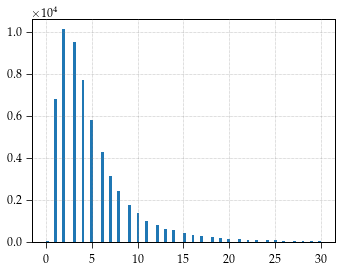

In [21]:
posts.AnswerCount.hist(bins=100, range=[0, 30])